<a href="https://colab.research.google.com/github/tehernandez/MIA_Actividades/blob/main/Proyecto_MIA_Clasificaci%C3%B3nTickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install mpi4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 14.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp38-cp38-linux_x86_64.whl size=4438574 sha256=b84fda8bf3dd009ec7e36552497bda5a755d4807b1993025889ec5ac6983871d
  Stored in directory: /root/.cache/pip/wheels/f3/35/48/0b9a7076995eea5ea64a7e4bc3f0f342f453080795276264e7
Successfully built mpi4py


In [2]:
import time
from mpi4py import MPI
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_regression, load_digits
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(ngram_range=(1,3))
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import LinearSVC
import nltk


In [4]:
dfDatostrain=pd.read_csv(r'tickets_2022.csv',index_col=0, encoding='latin-1')
dfDatostrain = dfDatostrain.replace(np.nan, "")
dfDatostrain


,TICKET,DESCRIPCION,DESCRIPCION_DET,FILA
No.,,,,
1,2022011044001604,problema: Compras no guardadas en mPos,,TI_Desarrollo Comercial
2,2022011044002381,Configuración de cliente 10304 para timbrado,NECESIDAD: \r\nFavor de configurar el cliente ...,TI_Desarrollo BackOffice
3,2022011044002498,Solicitud de modelo SAP con sku´s,Saber cual es el modelo SAP con skus con el qu...,TI_Desarrollo Comercial
4,2022011044003077,Borrar Prenda de Pedido,"Hola Shadey, me puedes ayudar a borrar una pre...",TI_Desarrollo Ecommerce
5,2022011044002863,Error al generar reporte,PROBLEMA: \r\nMe aparece el siguiente mensaje ...,TI_Desarrollo BI
...,...,...,...,...
2978,2022061044001346,Nuevo atributo,NECESIDAD: Crear un nuevo atributo en PIM a n...,TI_Desarrollo Operaciones
2979,2022061044001515,Por que existe diferencia del inventario final...,NECESIDAD: \r\nPor que existe diferencia del ...,TI_Desarrollo BackOffice Sofm
2980,2022061044001597,Actualización de reporte power BI,NECESIDAD: \r\nSe requieren ajustes al reporte...,TI_Desarrollo BI


In [ ]:
categoria = ['TI_Desarrollo BI',
 'TI_Desarrollo BackOffice',
 'TI_Desarrollo BackOffice Sofm',
 'TI_Desarrollo Comercial',
 'TI_Desarrollo Ecommerce',
 'TI_Desarrollo MDW',
 'TI_Desarrollo MPOS',
 'TI_Desarrollo Operaciones',
 'TI_Manhattan',
 'TI_Proyectos']
categoria


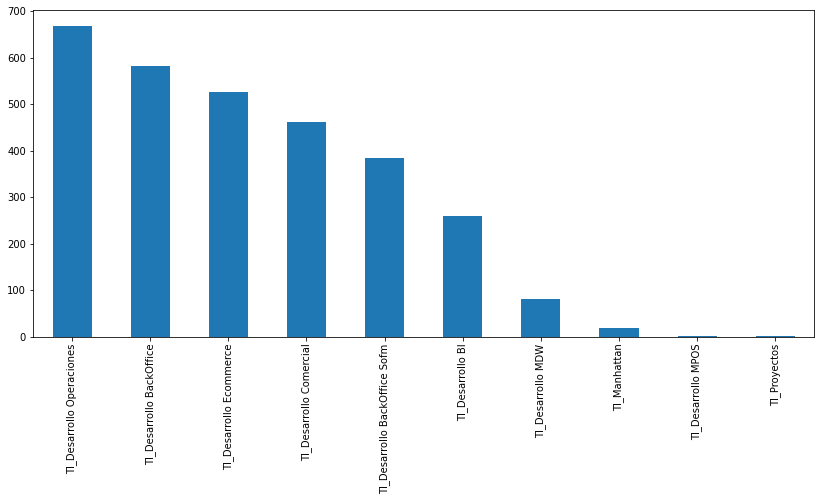

In [6]:
plt.figure(figsize=(14,6))
dfDatostrain.FILA.value_counts().plot(kind='bar')
plt.show()

In [7]:
encoder = LabelEncoder()
dfDatostrain['descripcion_number']=encoder.fit_transform(dfDatostrain.DESCRIPCION.values)
dfDatostrain['descripcion_det_number']=encoder.fit_transform(dfDatostrain.DESCRIPCION_DET.values)
dfDatostrain['fila_number']=encoder.fit_transform(dfDatostrain.FILA.values)
dfDatostrain

,TICKET,DESCRIPCION,DESCRIPCION_DET,FILA,descripcion_number,descripcion_det_number,fila_number
No.,,,,,,,
1,2022011044001604,problema: Compras no guardadas en mPos,,TI_Desarrollo Comercial,2161,0,3
2,2022011044002381,Configuración de cliente 10304 para timbrado,NECESIDAD: \r\nFavor de configurar el cliente ...,TI_Desarrollo BackOffice,532,844,1
3,2022011044002498,Solicitud de modelo SAP con sku´s,Saber cual es el modelo SAP con skus con el qu...,TI_Desarrollo Comercial,1887,2045,3
4,2022011044003077,Borrar Prenda de Pedido,"Hola Shadey, me puedes ayudar a borrar una pre...",TI_Desarrollo Ecommerce,292,558,4
5,2022011044002863,Error al generar reporte,PROBLEMA: \r\nMe aparece el siguiente mensaje ...,TI_Desarrollo BI,777,1775,0
...,...,...,...,...,...,...,...
2978,2022061044001346,Nuevo atributo,NECESIDAD: Crear un nuevo atributo en PIM a n...,TI_Desarrollo Operaciones,1230,1243,7
2979,2022061044001515,Por que existe diferencia del inventario final...,NECESIDAD: \r\nPor que existe diferencia del ...,TI_Desarrollo BackOffice Sofm,1320,1636,2
2980,2022061044001597,Actualización de reporte power BI,NECESIDAD: \r\nSe requieren ajustes al reporte...,TI_Desarrollo BI,136,977,0


In [8]:
X=dfDatostrain[['descripcion_number','descripcion_det_number']]
y=dfDatostrain['fila_number']


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train =scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter =2500, 
                    alpha = 0.0001,solver = 'adam', random_state = 80, 
                    tol = 0.0001)


In [55]:
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)



In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.27      0.06      0.10        51
           1       0.31      0.27      0.29       149
           2       0.38      0.49      0.43        91
           3       0.30      0.16      0.20       115
           4       0.50      0.66      0.57       137
           5       0.00      0.00      0.00        23
           7       0.49      0.68      0.57       175
           8       0.00      0.00      0.00         5

    accuracy                           0.42       746
   macro avg       0.28      0.29      0.27       746
weighted avg       0.38      0.42      0.39       746



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
